In [0]:
#import necessary library

from pyspark.sql import SparkSession
from pyspark.sql.functions import corr

spark=SparkSession.builder.getOrCreate()

In [0]:
#Load the Data

df=spark.read.csv('dbfs:/FileStore/tables/export.csv',header=True,inferSchema=True)

In [0]:
#change the data type

from pyspark.sql.functions import col
data = df.withColumn("Avg Rating (All)", df["Avg Rating (All)"].cast("float"))

In [0]:
#Correlation between columns

correlation = data.select(corr("Size (bytes)", "Rating (All)").alias("Size (bytes)_Rating (All)_corr"),
                         corr("Size (bytes)", "Avg Rating (All)").alias("Size (bytes)_Avg Rating (All)_corr"),
                         corr("Rating (All)", "Avg Rating (All)").alias("Rating (All)_Avg Rating (All)_corr"))
correlation.show()


+------------------------------+----------------------------------+----------------------------------+
|Size (bytes)_Rating (All)_corr|Size (bytes)_Avg Rating (All)_corr|Rating (All)_Avg Rating (All)_corr|
+------------------------------+----------------------------------+----------------------------------+
|          0.004486316612060564|                0.0662557199780597|                0.0833099660459741|
+------------------------------+----------------------------------+----------------------------------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Create a Spark session
spark = SparkSession.builder.appName("RegressionAnalysis").getOrCreate()

# Read the dataset into a DataFrame
data = spark.read.csv("dbfs:/FileStore/tables/export.csv", header=True, inferSchema=True)

# Prepare the features column
assembler = VectorAssembler(inputCols=["Size (bytes)"], outputCol="features_vector")
data = assembler.transform(data)

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3])

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features_vector", labelCol="Rating (All)")

# Fit the model to the training data
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluation = model.evaluate(test_data)
print("Root Mean Squared Error:", evaluation.rootMeanSquaredError)
print("R-squared:", evaluation.r2)


Root Mean Squared Error: 75847.1156607869
R-squared: -0.0021958955253160717


In [0]:
lr = LinearRegression(featuresCol="features_vector", labelCol="Price")

# Fit the model to the training data
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluation = model.evaluate(test_data)
print("Root Mean Squared Error:", evaluation.rootMeanSquaredError)
print("R-squared:", evaluation.r2)


Root Mean Squared Error: 9.004160267139701
R-squared: 0.021452719266227827


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
pandas_df = df.toPandas()


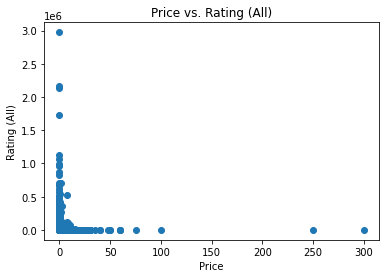

In [0]:
#Analyzing the relationship between app pricing and its success, considering factors such as number of downloads and ratings.

plt.scatter(pandas_df['Price'], pandas_df['Rating (All)'])
plt.xlabel('Price')
plt.ylabel('Rating (All)')
plt.title('Price vs. Rating (All)')
plt.show()


Out[33]: <function matplotlib.pyplot.show(close=None, block=None)>

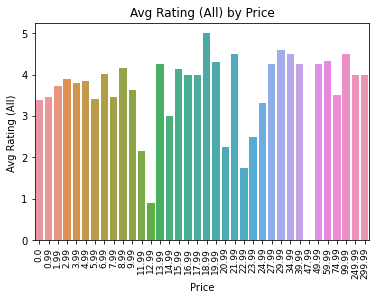

In [0]:
avg_ratings = pandas_df.groupby('Price')['Avg Rating (All)'].mean().reset_index()
sns.barplot(x='Price', y='Avg Rating (All)', data=avg_ratings)
plt.xlabel('Price')
plt.ylabel('Avg Rating (All) ')
plt.title('Avg Rating (All) by Price')
plt.xticks(rotation=90)  
plt.xlabel('App Pricing')
plt.xticks(fontsize=9)  
plt.xlabel('Price')


plt.show
